# HW4 - predicting spending

## Data input and simple statistics

In [2]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals
import numpy as np # np is an alias pointing to numpy
import pandas as pd # pd is an alias pointing to pandas
pd.set_option('display.max_columns', 50) #increasing no columns to display 
pd.set_option('display.width', 120) #increasing panda output window width

import sys ,warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

df = pd.read_excel("HW4.xlsx")
print(df.shape) # no of rows and columns in data
print()
print(df.head()) # understanding the data by viewing first 5 rows
print(df.describe(include='all')) # simple statistics on each column in data
print()
print(df.isnull().any())  # to check if any column has missing values

(2000, 25)

   sequence_number  US  source_a  source_c  source_b  source_d  source_e  source_m  source_o  source_h  source_r  \
0                1   1         0         0         1         0         0         0         0         0         0   
1                2   1         0         0         0         0         1         0         0         0         0   
2                3   1         0         0         0         0         0         0         0         0         0   
3                4   1         0         1         0         0         0         0         0         0         0   
4                5   1         0         1         0         0         0         0         0         0         0   

   source_s  source_t  source_u  source_p  source_x  source_w  Freq  last_update_days_ago  1st_update_days_ago  \
0         0         0         0         0         0         0     2                  3662                 3662   
1         0         0         0         0         0         0  

## Numeric variables distributions

C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


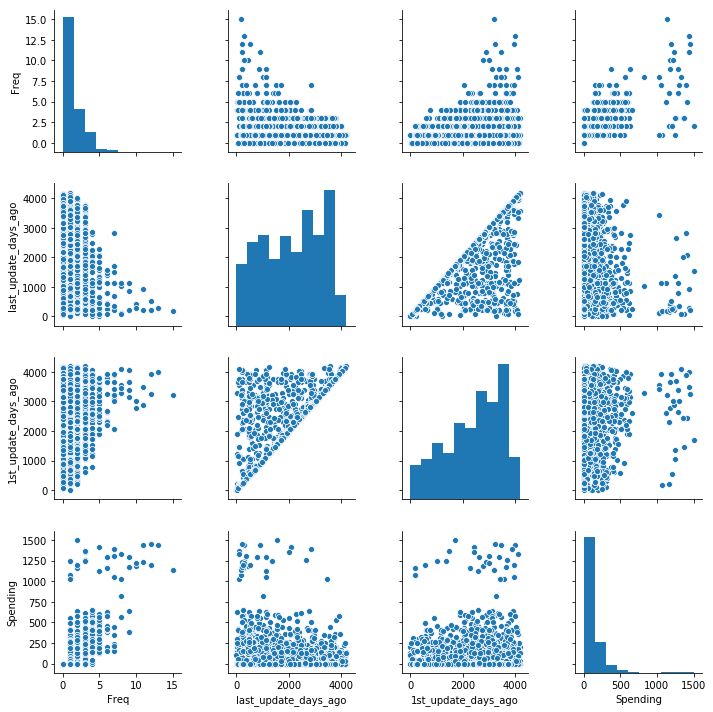

In [3]:
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

col1 = ['Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending'] # Select Attributes
#col2 = ['US','']

sns.pairplot(df[col1], size=2.5)              # Plot pairwise relationships in a dataset
plt.tight_layout()                            # Tight_layout automatically adjusts subplot params 
                                              # so that the subplot(s) fits in to the figure area.
# plt.savefig('housing_dataset.png', dpi=300) # Saves the figure in our local disk
plt.show()                                    # Display figure

## Binary variable distributions

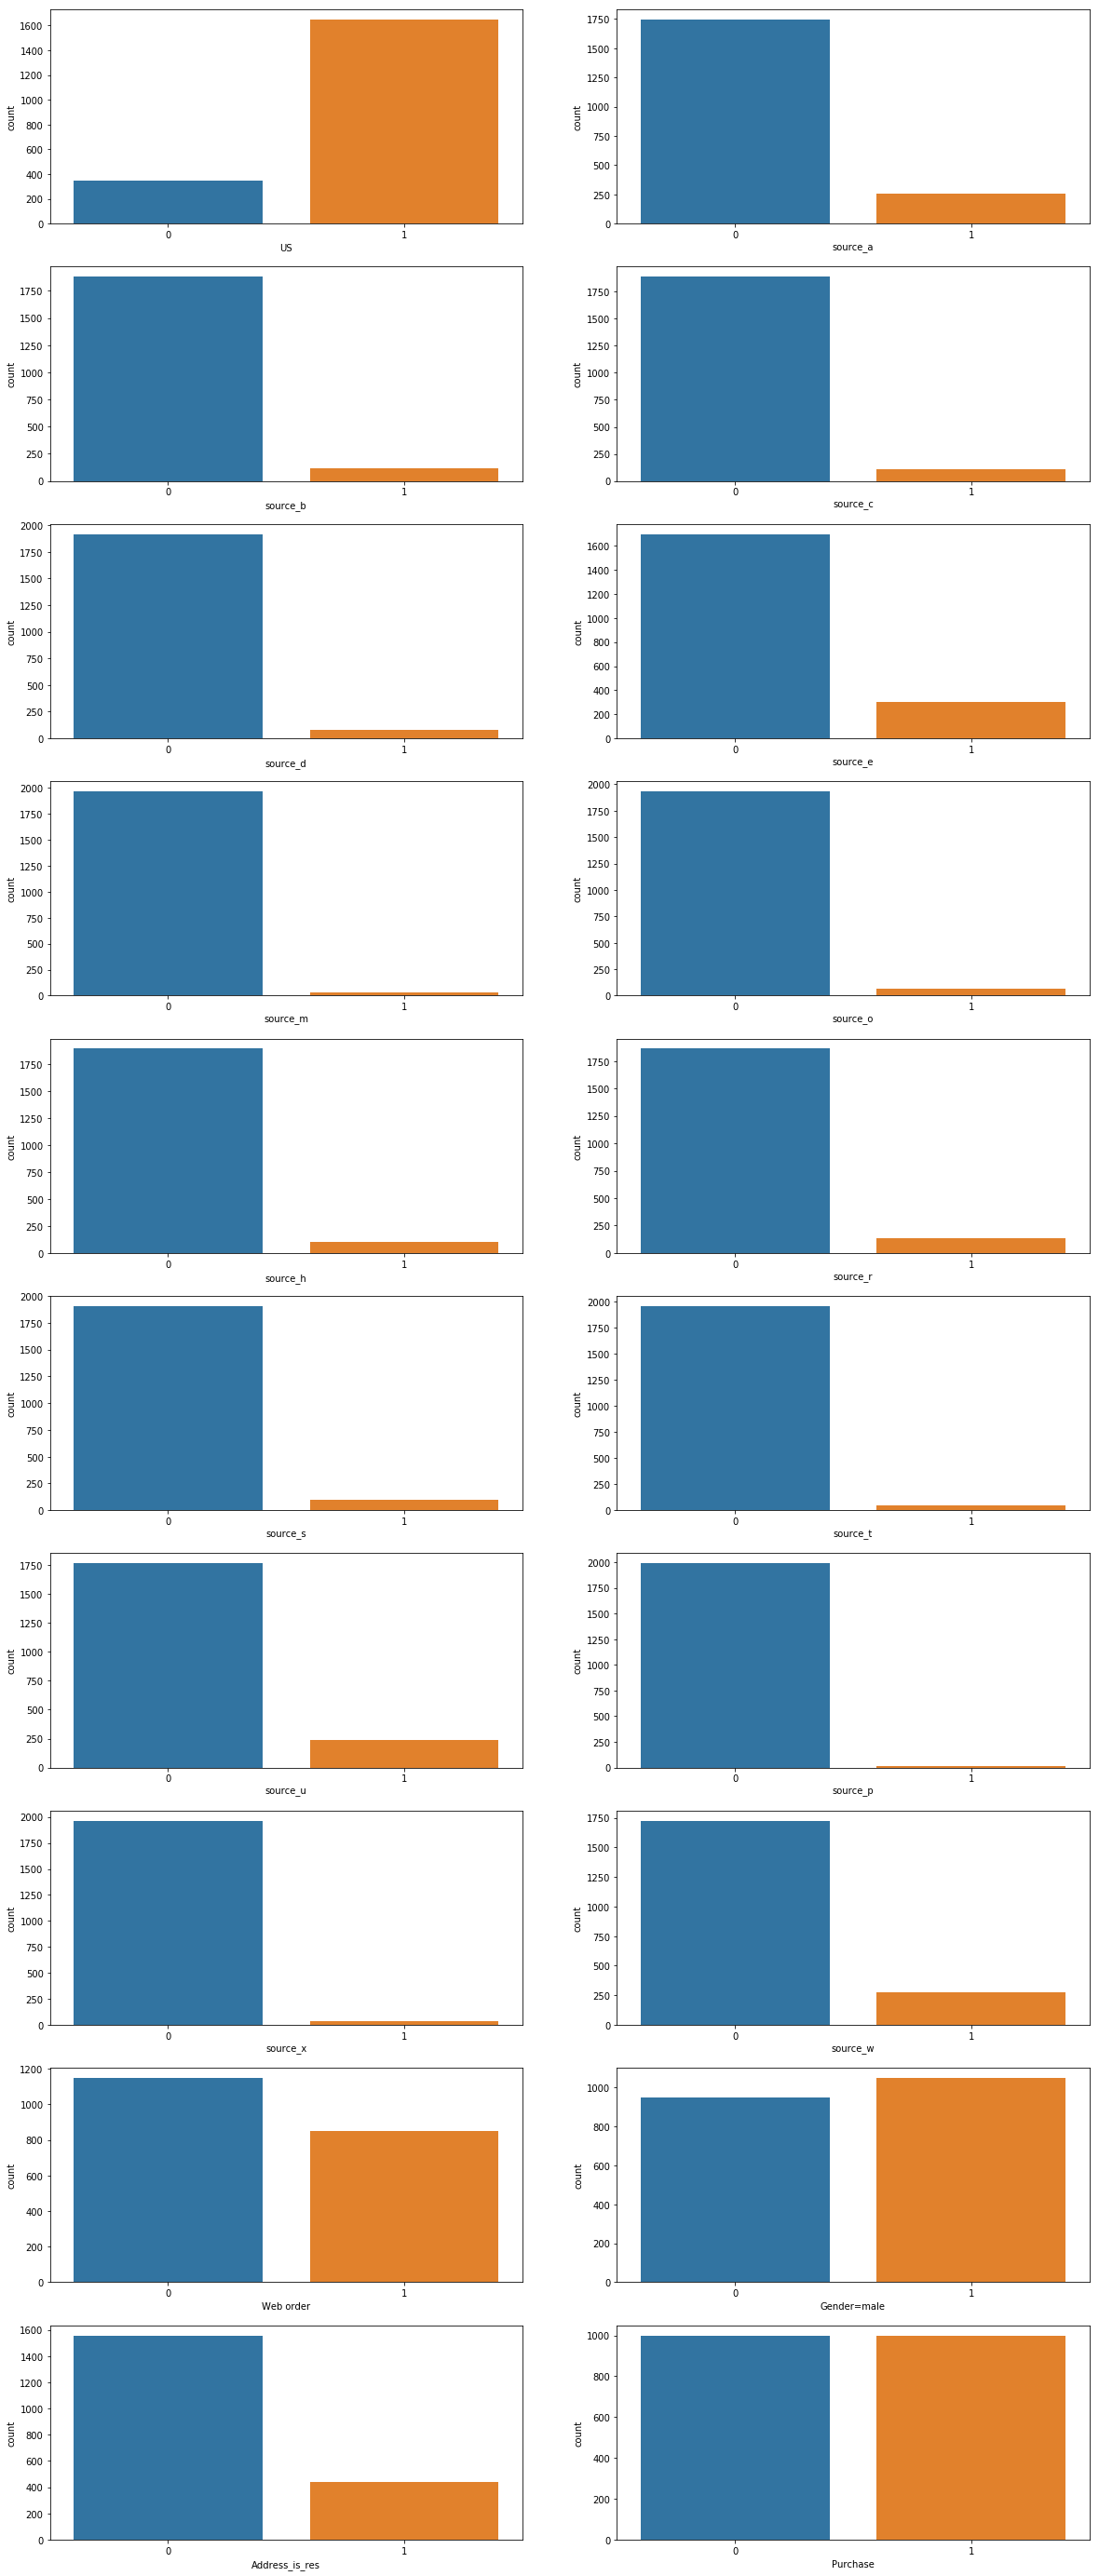

In [79]:
# countplots for categorical vars
fig, ax =plt.subplots(10,2,figsize=(20,50))
sns.countplot(df['US'], ax=ax[0,0])
sns.countplot(df['source_a'], ax=ax[0,1])
sns.countplot(df['source_b'], ax=ax[1,0])
sns.countplot(df['source_c'], ax=ax[1,1])
sns.countplot(df['source_d'], ax=ax[2,0])
sns.countplot(df['source_e'], ax=ax[2,1])
sns.countplot(df['source_m'], ax=ax[3,0])
sns.countplot(df['source_o'], ax=ax[3,1])
sns.countplot(df['source_h'], ax=ax[4,0])
sns.countplot(df['source_r'], ax=ax[4,1])
sns.countplot(df['source_s'], ax=ax[5,0])
sns.countplot(df['source_t'], ax=ax[5,1])
sns.countplot(df['source_u'], ax=ax[6,0])
sns.countplot(df['source_p'], ax=ax[6,1])
sns.countplot(df['source_x'], ax=ax[7,0])
sns.countplot(df['source_w'], ax=ax[7,1])
sns.countplot(df['Web order'], ax=ax[8,0])
sns.countplot(df['Gender=male'], ax=ax[8,1])
sns.countplot(df['Address_is_res'], ax=ax[9,0])
sns.countplot(df['Purchase'], ax=ax[9,1])

fig.show()

## Correlation matrix - Numeric variables

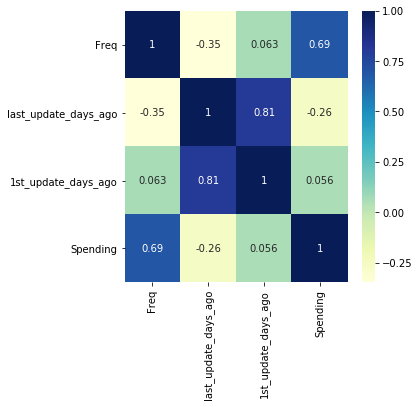

In [11]:
f, ax = plt.subplots(figsize=(5,5))
# creating correlation matrix
corr = df[col1].corr()

#using a heatmap to visualize the correlation matrix
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu",annot=True)

## Models on raw data

In [4]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Split validation class

X = df.iloc[:, 1:-2].values # Use all features as attributes except last 2 column
y = df['Spending'].values      # Set last column as target variable

lr = LinearRegression()

scores_lr = -cross_val_score(lr, X, y, cv=10,scoring ='neg_mean_squared_error')
scores_lr = np.sqrt(scores_lr)
print("Performance: %0.3f (+/- %0.3f)" % (scores_lr.mean(), scores_lr.std() * 2))

Performance: 125.549 (+/- 49.981)


In [5]:
#Lasso Regression Model
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1,random_state=42) 
scores_lasso = -cross_val_score(lasso, X, y, cv=10,scoring ='neg_mean_squared_error')
scores_lasso = np.sqrt(scores_lasso)
print("Performance: %0.3f (+/- %0.3f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

Performance: 125.469 (+/- 50.081)


In [6]:
#Ridge Regression Model
from sklearn.linear_model import Ridge # Ridge Regression class

ridge = Ridge(alpha=1.0,random_state=42) 
scores_ridge = -cross_val_score(ridge, X, y, cv=10,scoring ='neg_mean_squared_error')
scores_ridge = np.sqrt(scores_ridge)
print("Performance: %0.3f (+/- %0.3f)" % (scores_ridge.mean(), scores_ridge.std() * 2))

Performance: 125.528 (+/- 50.027)


In [44]:
#KNN Regression Model
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
# Fit regression model
n_neighbors = 5
#Normalize Data
sc = StandardScaler()
#sc.fit(X_train)
sc.fit(X)
X_std = sc.transform(X)

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance') #Regression based on k-nearest neighbors.
scores_knn = -cross_val_score(knn, X_std, y, cv=10,scoring ='neg_mean_squared_error')
scores_knn  = np.sqrt(scores_knn)
print("Performance: %0.3f (+/- %0.3f)" % (scores_knn.mean(), scores_knn.std() * 2))

Performance: 147.119 (+/- 57.200)


In [7]:
#Decision tree Regression Model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5,random_state=42)
scores_tree = -cross_val_score(tree, X, y, cv=10,scoring ='neg_mean_squared_error')
scores_tree  = np.sqrt(scores_tree)
print("Performance: %0.3f (+/- %0.3f)" % (scores_tree.mean(), scores_tree.std() * 2))

Performance: 135.742 (+/- 63.272)


## Feature engineering and transformations

In [10]:
df1= df.copy()
df1['Duration'] = df1['1st_update_days_ago'] - df1['last_update_days_ago']
df1['ratio1'] = df1['1st_update_days_ago']/df1['Freq']
df1['ratio2'] = df1['last_update_days_ago'] /df1['Freq']
df1['Freq'] = np.sqrt(df1['Freq'])
#df1['Spending'] = np.log(df1["Spending"]+1)
y1= df1['Spending'].values      # Set last column as target variable
df1.drop(['Purchase','Spending'],axis=1, inplace=True)

df1 = df1.replace([np.inf, -np.inf],0)

X1 = df1.iloc[:, 1:].values # Use all features as attributes except last but one column


## Models on transformed data

In [36]:
scores_lr = -cross_val_score(lr, X1, y1, cv=10,scoring = 'neg_mean_squared_error')
scores_lr = np.sqrt(scores_lr)
print("Performance linear: %0.3f (+/- %0.3f)" % (scores_lr.mean(), scores_lr.std() * 2))

scores_lasso = -cross_val_score(lasso, X1, y1, cv=10,scoring = 'neg_mean_squared_error')
scores_lasso = np.sqrt(scores_lasso)
print("Performance lasso: %0.3f (+/- %0.3f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

scores_ridge = -cross_val_score(ridge, X1, y1, cv=10,scoring = 'neg_mean_squared_error')
scores_ridge = np.sqrt(scores_ridge)
print("Performance ridge: %0.3f (+/- %0.3f)" % (scores_ridge.mean(), scores_ridge.std() * 2))

sc.fit(X1)
X1_std = sc.transform(X1)
scores_knn = -cross_val_score(knn, X1_std, y1, cv=10,scoring = 'neg_mean_squared_error')
scores_knn = np.sqrt(scores_knn)
print("Performance knn: %0.3f (+/- %0.3f)" % (scores_knn.mean(), scores_knn.std() * 2))

scores_tree = -cross_val_score(tree, X1, y1, cv=10,scoring = 'neg_mean_squared_error')
scores_tree = np.sqrt(scores_tree)
print("Performance rtree: %0.3f (+/- %0.3f)" % (scores_tree.mean(), scores_tree.std() * 2))

Performance linear: 132.049 (+/- 50.172)
Performance lasso: 131.964 (+/- 50.323)
Performance ridge: 132.025 (+/- 50.241)
Performance knn: 152.273 (+/- 60.407)
Performance rtree: 141.109 (+/- 69.546)


## Parameter tuning - linear regression

In [12]:
# linear regression parameter tuning
from sklearn.model_selection import GridSearchCV,KFold
inner_cv = KFold(n_splits=5, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True,random_state=42)
parameters = {'normalize':['False','True']}      # range of parameters for the depth of the tree
gs_dt = GridSearchCV(LinearRegression(), parameters, n_jobs=5,scoring = 'neg_mean_squared_error') #GridSearchCV
gs_dt.fit(X1, y1) # Fit model

print(" Parameter Tuning")
print("Non-nested Performance: ", np.sqrt(-gs_dt.best_score_))
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = -cross_val_score(gs_dt, X=X, y=y, cv=outer_cv,scoring = 'neg_mean_squared_error')
nested_score_gs_dt = np.sqrt(nested_score_gs_dt)
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

 Parameter Tuning
Non-nested Performance:  134.6281967746648
Optimal Parameter:  {'normalize': 'False'}
Optimal Estimator:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize='False')
Nested CV Performance:  127.73377410933611  +/-  8.432893867509918


In [41]:
scores_lr = -cross_val_score(LinearRegression(normalize=False), X1, y1, cv=10,scoring='neg_mean_squared_error')
scores_lr = np.sqrt(scores_lr)
print("Performance: %0.3f (+/- %0.3f)" % (scores_lr.mean(), scores_lr.std() * 2))

Performance: 132.049 (+/- 50.172)


## Parameter tuning - lasso regression

In [13]:
# lasso regression parameter tuning
parameters = {'normalize':['False','True'],'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}      # range of parameters
gs_dt = GridSearchCV(Lasso(random_state=42), parameters, n_jobs=5,scoring='neg_mean_squared_error') #GridSearchCV
gs_dt.fit(X1, y1) # Fit model

print(" Parameter Tuning")
print("Non-nested Performance: ", np.sqrt(-gs_dt.best_score_))
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = -cross_val_score(gs_dt, X=X1, y=y1, cv=outer_cv,scoring='neg_mean_squared_error')
nested_score_gs_dt = np.sqrt(nested_score_gs_dt)
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

 Parameter Tuning
Non-nested Performance:  134.6239906372296
Optimal Parameter:  {'alpha': 0.001, 'normalize': 'False'}
Optimal Estimator:  Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize='False', positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Nested CV Performance:  134.11910809403417  +/-  8.989408321094544


In [14]:
scores_la = -cross_val_score(Lasso(normalize=False,alpha= 0.001,random_state=42), X1, y1, cv=10,scoring='neg_mean_squared_error')
scores_la= np.sqrt(scores_la)
print("Performance: %0.3f (+/- %0.3f)" % (scores_la.mean(), scores_la.std() * 2))

Performance: 132.048 (+/- 50.173)


## Parameter tuning - Ridge regression

In [15]:
# ridge regression parameter tuning
parameters = {'normalize':['False','True'],'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}      # range of parameters for the depth of the tree
gs_dt = GridSearchCV(Ridge(random_state=42), parameters, n_jobs=5,scoring='neg_mean_squared_error') #GridSearchCV
gs_dt.fit(X1, y1) # Fit model

print(" Parameter Tuning")
print("Non-nested Performance: ", np.sqrt(-gs_dt.best_score_))
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = -cross_val_score(gs_dt, X=X1, y=y1, cv=outer_cv,scoring='neg_mean_squared_error')
nested_score_gs_dt = np.sqrt(nested_score_gs_dt)
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

 Parameter Tuning
Non-nested Performance:  134.626022572998
Optimal Parameter:  {'alpha': 0.0001, 'normalize': 'False'}
Optimal Estimator:  Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize='False', random_state=42, solver='auto', tol=0.001)
Nested CV Performance:  134.07593270844978  +/-  8.994662596704257


In [16]:
scores_r = -cross_val_score(Ridge(normalize=False,alpha= 0.0001,random_state=42), X1, y1, cv=10,scoring='neg_mean_squared_error')
scores_r =np.sqrt(scores_r)
print("Performance: %0.3f (+/- %0.3f)" % (scores_r.mean(), scores_r.std() * 2))

Performance: 132.049 (+/- 50.172)


## Parameter tuning - regression tree

In [17]:
# Tree model parameter tuning

parameters = {'max_depth':range(3,50),'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                              'min_samples_split':[2,3,4,5,6,7,8,9,10]}      # range of parameters for the depth of the tree
gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters, n_jobs=4,scoring='neg_mean_squared_error') #GridSearchCV
gs_dt.fit(X1, y1) # Fit model

print(" Parameter Tuning")
print("Non-nested Performance: ", np.sqrt(-gs_dt.best_score_))
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = -cross_val_score(gs_dt, X=X1, y=y1, cv=outer_cv,scoring='neg_mean_squared_error')
nested_score_gs_dt = np.sqrt(nested_score_gs_dt)
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

 Parameter Tuning
Non-nested Performance:  138.11584197120405
Optimal Parameter:  {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=9,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
Nested CV Performance:  133.4362162864122  +/-  18.20458380612317


In [18]:
scores_dt = -cross_val_score(DecisionTreeRegressor(max_depth=10,min_samples_leaf=9,min_samples_split=2), X1, y1, cv=10,scoring='neg_mean_squared_error',random_state=42)
scores_dt = np.sqrt(scores_dt)
print("Performance: %0.3f (+/- %0.3f)" % (scores_dt.mean(), scores_dt.std() * 2))

Performance: 136.368 (+/- 47.338)


## Parameter tuning - KNN regression

In [59]:
# Choosing k for kNN AND type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsRegressor(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
                               'weights':['uniform','distance']}],
                  cv=inner_cv,
                  n_jobs=5,scoring='neg_mean_squared_error')

gs_knn = gs_knn.fit(X1_std,y1)  
print("\n Parameter Tuning - KNN algorithm")
print("Non-nested CV F1 Score: ", np.sqrt(-gs_knn.best_score_))
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = -cross_val_score(gs_knn, X=X1_std, y=y1, cv=outer_cv,scoring='neg_mean_squared_error')
nested_score_gs_knn = np.sqrt(nested_score_gs_knn)
print("Nested CV F1 Score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning - KNN algorithm
Non-nested CV F1 Score:  148.19420733280924
Optimal Parameter:  {'n_neighbors': 17, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=17, p=2,
          weights='uniform')
Nested CV F1 Score:  148.01883783740783  +/-  14.254301643338572


In [60]:
scores_kn = -cross_val_score(neighbors.KNeighborsRegressor(n_neighbors=17,weights='uniform',p=2,metric='minkowski'), X1_std, y1, cv=10,scoring='neg_mean_squared_error')
scores_kn = np.sqrt(scores_kn)
print("Performance: %0.3f (+/- %0.3f)" % (scores_kn.mean(), scores_kn.std() * 2))

Performance: 145.490 (+/- 63.781)
